In [1]:
import pandas as pd
data=pd.read_csv('Placement.csv')

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
data[(data['degree_t']=='Sci&Tech') & (data['status']=="Placed")].sort_values(by="salary",ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,0,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,78,0,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,164,0,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,175,0,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,54,0,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [6]:
data=data.drop(['sl_no','salary'],axis=1) 

In [7]:
data['ssc_b']=data['ssc_b'].map({'Central':1,'Others':0})

In [8]:
data['hsc_b']=data['hsc_b'].map({'Central':1,'Others':0})

In [9]:
data['hsc_s']=data['hsc_s'].map({'Science':2,'Commerce':1,'Arts':0})

In [10]:
data['degree_t']=data['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})

In [11]:
data['specialisation']=data['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})

In [12]:
data['workex']=data['workex'].map({'Yes':1,'No':0})

In [13]:
data['status']=data['status'].map({'Placed':1,'Not Placed':0})

In [14]:
x=data.drop('status',axis=1)
y=data['status']

In [15]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,1,77.60,1,0,91.0,0,74.49
211,0,58.00,0,60.00,0,2,72.00,2,0,74.0,0,53.62
212,0,67.00,0,67.00,0,1,73.00,1,1,59.0,0,69.72
213,1,74.00,0,66.00,0,1,58.00,1,0,70.0,1,60.23


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
y_train

93     0
84     1
95     1
137    1
210    1
      ..
106    0
14     0
92     1
179    0
102    1
Name: status, Length: 172, dtype: int64

In [20]:
k = 5

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_scaled, y_train) 

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(x_test_scaled)  
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.8140


In [22]:
new_data=pd.DataFrame({
    'gender':0,
    'ssc_p':80.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
    'specialisation':1,
    'mba_p':58.8,
},index=[0])
placement_prediction = knn.predict(new_data)
if placement_prediction == 0:
    print("Placement Not Likely")
else:
    print("Placement Likely")

Placement Likely


In [23]:
scores=[]
for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))

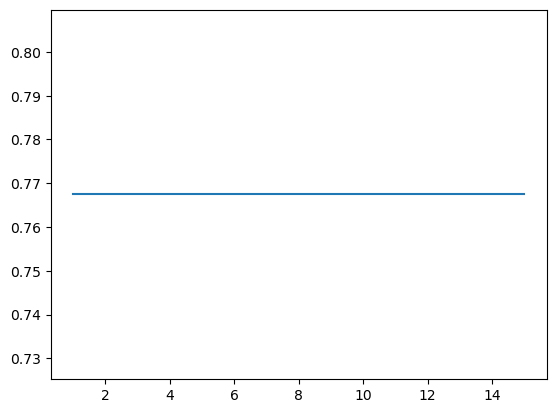

In [24]:
plt.plot(range(1,16),scores)